<a href="https://colab.research.google.com/github/KendallScott/Capstone/blob/main/Working%20RNN/New_Variables_TN_WV_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import os
import numpy as np
import pandas as pd

# Geospatial processing packages
import geopandas as gpd

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Loading dataframe on current active/and closed coal mines (provided by app voices)

In [41]:
directory_path = '/content/drive/MyDrive/Mines_Data/'
directory_files = os.listdir(directory_path)

df = pd.DataFrame()
z=0
for i in directory_files:
    df_file = pd.read_csv(os.path.join(directory_path, i), encoding = 'ISO-8859-1',low_memory=False)
    df_file['year'] = directory_files[z]
    df_file['year'] = df_file['year'].str.slice(3, 7)
    df_file['end_date'] = df_file['year']+'-07-31'
    df_file['start_date'] = df_file['year']+'-07-01'
    df_file['start_date'] = pd.to_datetime(df_file['start_date'])
    df_file['end_date'] = pd.to_datetime(df_file['end_date'])

    df_file['State'] = directory_files[z]
    df_file['State'] = df_file['State'].str.slice(0, 2)

    df = pd.concat([df, df_file])

    z+=1


In [42]:
all_year_mines = df['mine_id'][df['start_date']=='07-01-2023'].unique()
df = df.query('mine_id in @all_year_mines')

all_year_mines = df['mine_id'][df['year']=='2019'].unique()
df = df.query('mine_id in @all_year_mines')
group_df = df[['orig_perm_id', 'start_date', 'mine_id', 'Company', 'State', 'latitude', 'longitude']].groupby(['orig_perm_id', 'start_date', 'mine_id', 'State',  'latitude', 'longitude']).count().reset_index()
len(group_df)


525346

In [43]:
df['label']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10081    6.0
10082    7.0
10083    1.0
10084    1.0
10085    1.0
Name: label, Length: 1331169, dtype: float64

In [44]:
group_df

,orig_perm_id,start_date,mine_id,State,latitude,longitude,Company
0,0070008,2017-07-01,00000000000000000611,ky,36.840808,-83.519067,1
1,0070008,2017-07-01,00000000000000000611,ky,36.842605,-83.519067,1
2,0070008,2017-07-01,00000000000000000611,ky,36.853385,-83.519067,2
3,0070008,2017-07-01,00000000000000000611,ky,36.865961,-83.517270,1
4,0070008,2017-07-01,00000000000000000611,ky,36.865961,-83.511880,1
...,...,...,...,...,...,...,...
525341,Z008881,2021-07-01,000000000000000001a4,wv,39.715417,-79.632955,2
525342,Z008881,2021-07-01,000000000000000001a4,wv,39.715417,-79.631158,2
525343,Z008881,2021-07-01,000000000000000001a4,wv,39.717214,-79.634752,2
525344,Z008881,2021-07-01,000000000000000001a4,wv,39.717214,-79.632955,2


### aggregating to averages of land class(the probability) classes

In [45]:
#mapping demo in python https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=SI5i7rboSGFL&uniqifier=2
# Read the downloaded file
#419bdf	water, #397d49	trees, #88b053	grass, #7a87c6	flooded_vegetation, #e49635	crops, #dfc35a	shrub_and_scrub, #c4281b	built, #a59b8f	bare, #b39fe1	snow_and_ice

label0 = df[['orig_perm_id', 'Company','mine_id','water', 'start_date', 'State']].groupby(['orig_perm_id', 'State','mine_id', 'start_date','Company']).mean().reset_index()
label1 = df[['orig_perm_id', 'Company','mine_id', 'trees', 'start_date', 'State']].groupby(['orig_perm_id', 'State','mine_id','start_date', 'Company']).mean().reset_index()
label2 = df[['orig_perm_id', 'Company','mine_id', 'grass', 'start_date', 'State']].groupby(['orig_perm_id', 'State','mine_id','start_date', 'Company']).mean().reset_index()
label3 = df[['orig_perm_id', 'Company','mine_id','flooded_vegetation', 'start_date', 'State']].groupby(['orig_perm_id', 'State','mine_id', 'start_date', 'Company']).mean().reset_index()
label4 = df[['orig_perm_id', 'Company','mine_id', 'crops', 'start_date', 'State']].groupby(['orig_perm_id', 'State', 'start_date','mine_id', 'Company']).mean().reset_index().drop_duplicates()
label5 = df[['orig_perm_id', 'Company','mine_id', 'shrub_and_scrub', 'start_date', 'State']].groupby(['orig_perm_id', 'State', 'start_date', 'mine_id','Company']).mean().reset_index()
label6 = df[['orig_perm_id', 'Company','mine_id', 'built', 'start_date', 'State']].groupby(['orig_perm_id', 'State', 'start_date','mine_id', 'Company']).mean().reset_index()
label7 = df[['orig_perm_id', 'Company','mine_id', 'bare', 'start_date', 'State']].groupby(['orig_perm_id', 'State', 'start_date','mine_id', 'Company']).mean().reset_index()
label8 = df[['orig_perm_id', 'Company','mine_id', 'snow_and_ice', 'start_date', 'State']].groupby(['orig_perm_id', 'State','start_date','mine_id', 'Company']).mean().reset_index()

label0 =label0.drop_duplicates()
label1 =label1.drop_duplicates()
label2 =label2.drop_duplicates()
label3 =label3.drop_duplicates()
label4 =label4.drop_duplicates()
label5 =label5.drop_duplicates()
label6 =label6.drop_duplicates()
label7 =label7.drop_duplicates()
label8 =label8.drop_duplicates()

group_df = df[['orig_perm_id', 'start_date', 'mine_id', 'Company', 'State']].groupby(['orig_perm_id', 'start_date', 'mine_id', 'State']).count().reset_index()
group_df = group_df.drop_duplicates()
group_df = group_df.rename(columns={"Company": "Observations"})
df = pd.merge(df, group_df, on=['orig_perm_id', 'start_date', 'mine_id', 'State'], how='left').drop_duplicates()

df = df[['Company', 'start_date', 'Observations', 'orig_perm_id', 'mine_id', 'State']].drop_duplicates()
df = df.reset_index()
df = df.drop(['index'], axis=1)

### joining aggregated values back into main dataframe
df = pd.merge(df, label0, on=['orig_perm_id', 'start_date', 'Company', 'State', 'mine_id'], how='left').drop_duplicates()
df = pd.merge(df, label1, on=['orig_perm_id', 'start_date', 'Company', 'State', 'mine_id'], how='left').drop_duplicates()
df = pd.merge(df, label2, on=['orig_perm_id', 'start_date', 'Company', 'State', 'mine_id'], how='left').drop_duplicates()
df = pd.merge(df, label3, on=['orig_perm_id', 'start_date', 'Company', 'State', 'mine_id'], how='left').drop_duplicates()
df = pd.merge(df, label4, on=['orig_perm_id', 'start_date', 'Company', 'State', 'mine_id'], how='left').drop_duplicates()
df = pd.merge(df, label5, on=['orig_perm_id', 'start_date', 'Company', 'State', 'mine_id'], how='left').drop_duplicates()
df = pd.merge(df, label6, on=['orig_perm_id', 'start_date', 'Company', 'State', 'mine_id'], how='left').drop_duplicates()
df = pd.merge(df, label7, on=['orig_perm_id', 'start_date', 'Company', 'State', 'mine_id'], how='left').drop_duplicates()
df = pd.merge(df, label8, on=['orig_perm_id', 'start_date', 'Company', 'State', 'mine_id'], how='left').drop_duplicates()

df.fillna(0, inplace=True)
df

,Company,start_date,Observations,orig_perm_id,mine_id,State,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,bare,snow_and_ice
0,B & C ENERGY INC,2023-07-01,45,8640180,00000000000000001112,ky,0.031113,0.623011,0.059563,0.032779,0.065345,0.062902,0.035015,0.032943,0.036427
1,RIDNER COAL CO INC,2023-07-01,4,9180010,00000000000000001d20,ky,0.031869,0.698788,0.039705,0.029274,0.039489,0.036189,0.033532,0.034271,0.043253
2,HERBERT WELLS,2023-07-01,2,0320080,000000000000000020c7,ky,0.032205,0.539393,0.055222,0.030944,0.088415,0.041989,0.070858,0.030897,0.037347
3,MOUNT VICTORY COAL CO INC,2023-07-01,16,404774X,00000000000000003095,ky,0.033029,0.735718,0.038324,0.029872,0.033263,0.031299,0.029638,0.032630,0.035219
4,EVERGREEN MINING INC,2023-07-01,30,8260501,0000000000000000086a,ky,0.030702,0.743186,0.033933,0.027343,0.029957,0.035815,0.029723,0.036228,0.032969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,LO-MING COAL CORP.,2017-07-01,1,U502397,0000000000000000085a,wv,0.031039,0.587889,0.039089,0.025979,0.048085,0.042070,0.107876,0.037235,0.042496
30474,"APPALACHIAN FUELS, LLC",2017-07-01,67,S304188,0000000000000000057b,wv,0.030835,0.739765,0.032717,0.027254,0.030536,0.037661,0.031239,0.037154,0.032554
30475,"CHICOPEE COAL COMPANY, INC.",2017-07-01,10,S007385,000000000000000007d5,wv,0.027965,0.710045,0.042984,0.025502,0.038912,0.048706,0.032311,0.033129,0.031919
30476,BELVA COAL COMPANY,2017-07-01,10,S009482,00000000000000000869,wv,0.036899,0.544176,0.040389,0.030385,0.046551,0.055853,0.064093,0.120093,0.039626


In [46]:

company_df = df[['Company', 'mine_id']].groupby(['mine_id']).nunique().sort_values('mine_id', ascending=False).reset_index()
company_df = company_df.rename(columns={"Company": "Companies_per_mine_id"})
df = pd.merge(df, company_df, on=['mine_id'], how='left').drop_duplicates()
df

,Company,start_date,Observations,orig_perm_id,mine_id,State,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,bare,snow_and_ice,Companies_per_mine_id
0,B & C ENERGY INC,2023-07-01,45,8640180,00000000000000001112,ky,0.031113,0.623011,0.059563,0.032779,0.065345,0.062902,0.035015,0.032943,0.036427,1
1,RIDNER COAL CO INC,2023-07-01,4,9180010,00000000000000001d20,ky,0.031869,0.698788,0.039705,0.029274,0.039489,0.036189,0.033532,0.034271,0.043253,1
2,HERBERT WELLS,2023-07-01,2,0320080,000000000000000020c7,ky,0.032205,0.539393,0.055222,0.030944,0.088415,0.041989,0.070858,0.030897,0.037347,1
3,MOUNT VICTORY COAL CO INC,2023-07-01,16,404774X,00000000000000003095,ky,0.033029,0.735718,0.038324,0.029872,0.033263,0.031299,0.029638,0.032630,0.035219,1
4,EVERGREEN MINING INC,2023-07-01,30,8260501,0000000000000000086a,ky,0.030702,0.743186,0.033933,0.027343,0.029957,0.035815,0.029723,0.036228,0.032969,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,LO-MING COAL CORP.,2017-07-01,1,U502397,0000000000000000085a,wv,0.031039,0.587889,0.039089,0.025979,0.048085,0.042070,0.107876,0.037235,0.042496,2
30474,"APPALACHIAN FUELS, LLC",2017-07-01,67,S304188,0000000000000000057b,wv,0.030835,0.739765,0.032717,0.027254,0.030536,0.037661,0.031239,0.037154,0.032554,2
30475,"CHICOPEE COAL COMPANY, INC.",2017-07-01,10,S007385,000000000000000007d5,wv,0.027965,0.710045,0.042984,0.025502,0.038912,0.048706,0.032311,0.033129,0.031919,2
30476,BELVA COAL COMPANY,2017-07-01,10,S009482,00000000000000000869,wv,0.036899,0.544176,0.040389,0.030385,0.046551,0.055853,0.064093,0.120093,0.039626,2


In [47]:

multistate_mine_id = df[['orig_perm_id', 'mine_id']].groupby(['mine_id']).nunique().sort_values('mine_id', ascending=False).reset_index()
multistate_mine_id = multistate_mine_id.rename(columns={"orig_perm_id": "multistate_mine_id"})
df = pd.merge(df, multistate_mine_id, on=['mine_id'], how='left').drop_duplicates()

permid_df = df[['orig_perm_id', 'mine_id']].groupby(['orig_perm_id']).nunique().sort_values('orig_perm_id', ascending=False).reset_index()
permid_df

permid_df = permid_df.rename(columns={"mine_id": "mines_per_perm_id"})
df = pd.merge(df, permid_df, on=['orig_perm_id'], how='left').drop_duplicates()
df

,Company,start_date,Observations,orig_perm_id,mine_id,State,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,bare,snow_and_ice,Companies_per_mine_id,multistate_mine_id,mines_per_perm_id
0,B & C ENERGY INC,2023-07-01,45,8640180,00000000000000001112,ky,0.031113,0.623011,0.059563,0.032779,0.065345,0.062902,0.035015,0.032943,0.036427,1,1,1
1,RIDNER COAL CO INC,2023-07-01,4,9180010,00000000000000001d20,ky,0.031869,0.698788,0.039705,0.029274,0.039489,0.036189,0.033532,0.034271,0.043253,1,1,1
2,HERBERT WELLS,2023-07-01,2,0320080,000000000000000020c7,ky,0.032205,0.539393,0.055222,0.030944,0.088415,0.041989,0.070858,0.030897,0.037347,1,1,1
3,MOUNT VICTORY COAL CO INC,2023-07-01,16,404774X,00000000000000003095,ky,0.033029,0.735718,0.038324,0.029872,0.033263,0.031299,0.029638,0.032630,0.035219,1,1,1
4,EVERGREEN MINING INC,2023-07-01,30,8260501,0000000000000000086a,ky,0.030702,0.743186,0.033933,0.027343,0.029957,0.035815,0.029723,0.036228,0.032969,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,LO-MING COAL CORP.,2017-07-01,1,U502397,0000000000000000085a,wv,0.031039,0.587889,0.039089,0.025979,0.048085,0.042070,0.107876,0.037235,0.042496,2,2,1
30474,"APPALACHIAN FUELS, LLC",2017-07-01,67,S304188,0000000000000000057b,wv,0.030835,0.739765,0.032717,0.027254,0.030536,0.037661,0.031239,0.037154,0.032554,2,2,1
30475,"CHICOPEE COAL COMPANY, INC.",2017-07-01,10,S007385,000000000000000007d5,wv,0.027965,0.710045,0.042984,0.025502,0.038912,0.048706,0.032311,0.033129,0.031919,2,2,1
30476,BELVA COAL COMPANY,2017-07-01,10,S009482,00000000000000000869,wv,0.036899,0.544176,0.040389,0.030385,0.046551,0.055853,0.064093,0.120093,0.039626,2,2,1


In [48]:
#50 mines with numerous mine ids per orig_perm_id
9856-9906

-50

In [49]:
df[['orig_perm_id', 'start_date', 'mine_id', 'Company', 'State']].groupby([ 'State']).count().reset_index()


,State,orig_perm_id,start_date,mine_id,Company
0,ky,26223,26223,26223,26223
1,tn,400,400,400,400
2,wv,3855,3855,3855,3855


### Creating empty rows for missing years

In [50]:
df['key'] = df['mine_id']+df['State']
df[['key', 'start_date']].groupby(['key']).nunique().sort_values('key', ascending=False)

df[['key', 'start_date']].groupby(['start_date']).nunique().sort_values('start_date', ascending=False)

,key
start_date,
2023-07-01,9187
2021-07-01,9361
2019-07-01,9812
2017-07-01,2118


In [51]:
date = ['2017-07-01', '2019-07-01', '2021-07-01']
df_clean = pd.DataFrame()
#imputation for missing years by permit_id

for x,i in enumerate(date):
  missing = df['key'][df['start_date']==date[x]].unique()
  df_clean_loop = df.loc[:, df.columns != 'start_date'].query('key not in @missing')

  df_clean_fill = df_clean_loop.groupby(['mine_id', 'orig_perm_id', 'Company', 'State', 'key']).mean().reset_index()
  df_clean_fill['start_date']=date[x]
  df_clean_fill['start_date'] = pd.to_datetime(df_clean_fill['start_date'])
  df_clean = df_clean.append(df_clean_fill)




<ipython-input-51-ddcb24a2927e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clean = df_clean.append(df_clean_fill)
<ipython-input-51-ddcb24a2927e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clean = df_clean.append(df_clean_fill)
<ipython-input-51-ddcb24a2927e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clean = df_clean.append(df_clean_fill)


In [52]:
df['imputation']=0
df_clean['imputation']=1
df = df.append(df_clean)
df[['mine_id', 'start_date']].groupby(['start_date']).nunique().sort_values('start_date', ascending=False)

### Removing any rows missing 2023

all_year_mines = df['mine_id'][df['start_date']=='07-01-2023'].unique()
df = df.query('mine_id in @all_year_mines')

<ipython-input-52-0f33bf262f76>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_clean)


In [53]:
date = ['2017-07-01', '2019-07-01', '2021-07-01', '2023-07-01']
df_clean = pd.DataFrame()
#imputation for missing years by permit_id

for x,i in enumerate(date):
  missing = df['mine_id'][df['start_date']==date[x]].unique()
  print('if zero, update succesful: ',len(df.query('key in @missing')))

if zero, update succesful:  0
if zero, update succesful:  0
if zero, update succesful:  0
if zero, update succesful:  0


In [54]:
df[['mine_id', 'start_date']].groupby(['start_date']).nunique().sort_values('start_date', ascending=False)

,mine_id
start_date,
2023-07-01,8457
2021-07-01,8457
2019-07-01,8457
2017-07-01,8457


In [55]:
#testing out skipping this merge
#df_merge = pd.merge(df, mines,  how='left', left_on=['orig_perm_id', 'State'], right_on = ['permit_id', 'State'])

In [394]:
tn = gpd.read_file('/content/drive/MyDrive/TN_Released_mines.geojson')
tn.columns

Index(['id', 'Shape_Area', 'Shape_Le_1', 'area_mine', 'auger', 'calculated',
       'coal_bed_n', 'coalmine_o', 'comment', 'company', 'contact', 'contour',
       'highwall', 'informatio', 'inspectabl', 'layer', 'mine_name',
       'mountainto', 'msha_id', 'national_i', 'path', 'permit_a_2',
       'permit_app', 'permit_id', 'permittee', 'post_smcra', 'reported_a',
       'shape_Leng', 'state_trib', 'steep_slop', 'geometry'],
      dtype='object')

In [396]:
tn['company']

0                        COALCO INC
1                         ENCOL INC
2                     DEBCO COAL CO
3      B + J EXCAVATING CO INC (TN)
4            CUMBERLAND COAL CO LLC
                   ...             
150       NATIONAL COAL CORPORATION
151                      ENERGY INC
152            TENNESSEE MINING INC
153            TRIPLE I COAL CO INC
154                     GARCOAL INC
Name: company, Length: 155, dtype: object

In [56]:
df_merge=df

In [59]:
df_file.columns

Index(['ï»¿', 'Ã¯Â»Â¿', 'id', 'longitude', 'latitude', 'time', 'water',
       'trees', 'grass', 'flooded_vegetation', 'crops', 'shrub_and_scrub',
       'built', 'bare', 'snow_and_ice', 'label', 'Company', 'mine_id',
       'orig_perm_id', 'year', 'end_date', 'start_date', 'State'],
      dtype='object')

In [196]:
directory_path = '/content/drive/MyDrive/Mines_Data_Clean/New_Variables_WV_TN/'
directory_files = os.listdir(directory_path)

precip = pd.DataFrame()
z=0
for i in directory_files:
    df_file = pd.read_csv(os.path.join(directory_path, i), encoding = 'ISO-8859-1',low_memory=False)
    df_file['start_date'] = df_file['start_date'].str.split(" ", 1, expand=True)[1]
    df_file['start_date'] = df_file['start_date'].str.slice(0, 13)

    df_file['mine_id'] = df_file['mine_id'].str.split(":", 1, expand=True)[0]
    df_file['mine_id'] = df_file['mine_id'].str.replace('\nName', '')

    precip = pd.concat([precip, df_file])

    z+=1

<ipython-input-196-4be6d559a4b4>:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_file['start_date'] = df_file['start_date'].str.split(" ", 1, expand=True)[1]
<ipython-input-196-4be6d559a4b4>:11: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_file['mine_id'] = df_file['mine_id'].str.split(":", 1, expand=True)[0]


### Precipitation Data

In [202]:
precip['mine_id'] = precip['mine_id'].str.split(" ", 1, expand=True)[1]

<ipython-input-202-f1711fe6e154>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  precip['mine_id'] = precip['mine_id'].str.split(" ", 1, expand=True)[1]


In [203]:
precip = precip.drop_duplicates()
keep_columns =['start_date', 'mine_id', 'Max Temperature', 'Precipitation', 'srad', 'vs','bi','fm1000','rmax' ]
precip = precip[keep_columns]

date = ['2017-07-01', '2019-07-01', '2021-07-01', '2023-07-01']
precip_clean = pd.DataFrame()

for x,i in enumerate(date):
  print(date[x])
  missing = precip['mine_id'][precip['start_date']==date[x]]
  #finds permit_id that don't have a row for that year
  precip_clean_loop = precip[keep_columns].query('mine_id not in @missing')

  precip_clean_fill = precip_clean_loop.groupby(['mine_id']).mean().reset_index()
  precip_clean_fill['start_date'] = date[x]
  precip_clean_fill['start_date'] = pd.to_datetime(precip_clean_fill['start_date'])
  precip_clean = precip_clean.append(precip_clean_fill)
  missing = precip_clean['mine_id'][precip_clean['start_date']==date[x]].unique()
  print('if zero, update succesful: ',len(precip_clean.query('mine_id not in @missing')))

  precip_clean = precip_clean.append(precip)

precip_clean['mine_id'] = precip_clean['mine_id'].str.strip()
precip_clean = precip_clean.groupby(['mine_id', 'start_date']).mean().reset_index()

2017-07-01
if zero, update succesful:  0
2019-07-01
if zero, update succesful:  8705
2021-07-01
if zero, update succesful:  15451
2023-07-01
if zero, update succesful:  22197


<ipython-input-203-049401a78596>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  precip_clean_fill = precip_clean_loop.groupby(['mine_id']).mean().reset_index()
<ipython-input-203-049401a78596>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precip_clean = precip_clean.append(precip_clean_fill)
<ipython-input-203-049401a78596>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precip_clean = precip_clean.append(precip)
<ipython-input-203-049401a78596>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numer

In [204]:
precip_clean

,mine_id,start_date,Max Temperature,Precipitation,srad,vs,bi,fm1000,rmax
0,00000000000000000000,2017-07-01,300.400004,11.466667,256.666667,3.833333,18.0,19.333333,94.266665
1,00000000000000000000,2019-07-01,300.400004,11.466667,256.666667,3.833333,18.0,19.333333,94.266665
2,00000000000000000000,2021-07-01,300.400004,11.466667,256.666667,3.833333,18.0,19.333333,94.266665
3,00000000000000000000,2023-07-01,300.400004,11.466667,256.666667,3.833333,18.0,19.333333,94.266665
4,00000000000000000000,2019-07-01,303.100006,0.000000,338.399994,2.800000,24.0,19.400000,95.699997
...,...,...,...,...,...,...,...,...,...
12367,00000000000000000962,2019-07-01,301.100006,2.850000,293.949997,3.000000,9.5,19.700000,93.349998
12368,00000000000000000962,2021-07-01,301.100006,2.850000,293.949997,3.000000,9.5,19.700000,93.349998
12369,00000000000000000962,2023-07-01,301.100006,2.850000,293.949997,3.000000,9.5,19.700000,93.349998
12370,00000000000000000962,2019-07-01,301.500000,0.000000,339.000000,2.000000,19.0,20.799999,95.000000


In [205]:
df_merge

,Company,start_date,Observations,orig_perm_id,mine_id,State,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,bare,snow_and_ice,Companies_per_mine_id,multistate_mine_id,mines_per_perm_id,key,imputation
0,B & C ENERGY INC,2023-07-01,45.0,8640180,00000000000000001112,ky,0.031113,0.623011,0.059563,0.032779,0.065345,0.062902,0.035015,0.032943,0.036427,1.0,1.0,1.0,00000000000000001112ky,0
1,RIDNER COAL CO INC,2023-07-01,4.0,9180010,00000000000000001d20,ky,0.031869,0.698788,0.039705,0.029274,0.039489,0.036189,0.033532,0.034271,0.043253,1.0,1.0,1.0,00000000000000001d20ky,0
2,HERBERT WELLS,2023-07-01,2.0,0320080,000000000000000020c7,ky,0.032205,0.539393,0.055222,0.030944,0.088415,0.041989,0.070858,0.030897,0.037347,1.0,1.0,1.0,000000000000000020c7ky,0
3,MOUNT VICTORY COAL CO INC,2023-07-01,16.0,404774X,00000000000000003095,ky,0.033029,0.735718,0.038324,0.029872,0.033263,0.031299,0.029638,0.032630,0.035219,1.0,1.0,1.0,00000000000000003095ky,0
4,EVERGREEN MINING INC,2023-07-01,30.0,8260501,0000000000000000086a,ky,0.030702,0.743186,0.033933,0.027343,0.029957,0.035815,0.029723,0.036228,0.032969,2.0,2.0,1.0,0000000000000000086aky,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,STUMP COAL COMPANY INC,2021-07-01,1.5,2985253,00000000000000002fbe,ky,0.027484,0.730087,0.032807,0.026845,0.036434,0.035243,0.031670,0.034360,0.040043,1.0,1.0,1.0,00000000000000002fbeky,1
675,ELKHORN EAGLE MINING COMPANY INC,2021-07-01,1.0,2985273,00000000000000002fca,ky,0.029705,0.730464,0.035289,0.027582,0.032840,0.038326,0.034288,0.037754,0.033707,1.0,1.0,1.0,00000000000000002fcaky,1
676,JEROLD AND JEFFREY COAL COMPANY INC,2021-07-01,1.5,2985288,00000000000000002fd2,ky,0.026915,0.738387,0.041519,0.026679,0.033050,0.036183,0.032921,0.030864,0.033014,1.0,1.0,1.0,00000000000000002fd2ky,1
677,LITTLE HACKNEY CREEK COAL CO,2021-07-01,1.5,2985319,00000000000000002fdc,ky,0.027767,0.748742,0.030551,0.028099,0.036952,0.026954,0.033159,0.029888,0.036835,1.0,1.0,1.0,00000000000000002fdcky,1


In [169]:
precip_clean['mine_id'] = precip_clean['mine_id'].str.slice(0, 26)
precip_clean['mine_id'] = precip_clean['mine_id'].str.replace('\nNa', '')

precip_clean['start_date'] = pd.to_datetime(precip_clean['start_date'])

In [326]:
df_merge_all = pd.merge(df_merge, precip_clean[['mine_id', 'start_date', 'Max Temperature', 'Precipitation', 'srad', 'vs','bi','fm1000','rmax']],  how='left', left_on=['mine_id', 'start_date'], right_on = ['mine_id', 'start_date'])

In [327]:
for i in df_merge_all.columns:
    if df_merge_all[i].isna().sum() > 0:
        print('{} has {}% NAs'.format(i,(df_merge_all[i].isna().sum() / len(df_merge_all))*100))

Max Temperature has 57.93431618303097% NAs
Precipitation has 57.93431618303097% NAs
srad has 57.93431618303097% NAs
vs has 57.93431618303097% NAs
bi has 57.93431618303097% NAs
fm1000 has 57.93431618303097% NAs
rmax has 57.93431618303097% NAs


In [328]:
df_merge_all = df_merge_all[df_merge_all['State']!='ky']

In [330]:
for i in df_merge_all.columns:
    if df_merge_all[i].isna().sum() > 0:
        print('{} has {}% NAs'.format(i,(df_merge_all[i].isna().sum() / len(df_merge_all))*100))

In [331]:
df_merge_all[['State', 'mine_id']].groupby(['State']).nunique().sort_values('State', ascending=False)

,mine_id
State,
wv,1627
tn,134


In [332]:
columns_to_drop = ['State_alt', 'id']
all_mines = df_merge_all.sort_values(by=['mine_id', 'orig_perm_id', 'start_date']).reset_index()
all_mines = all_mines.drop(columns = 'index')
#all_mines['edit_year'] = all_mines['edit_year'].astype(str)
#all_mines['edit_year'] = all_mines['edit_year'].str.replace('.0','')
#all_mines['edit_year'] = all_mines['edit_year'].astype(object)

## Imputation with mode


In [333]:
all_mines['Precipitation'] = all_mines['Precipitation'].fillna(all_mines['Precipitation'].mode().iloc[0])
all_mines['Max Temperature'] = all_mines['Max Temperature'].fillna(all_mines['Max Temperature'].mode().iloc[0])
all_mines['Max fm1000'] = all_mines['fm1000'].fillna(all_mines['fm1000'].mode().iloc[0])
all_mines['srad'] = all_mines['srad'].fillna(all_mines['srad'].mode().iloc[0])
all_mines['vs'] = all_mines['vs'].fillna(all_mines['vs'].mode().iloc[0])
all_mines['rmax'] = all_mines['rmax'].fillna(all_mines['rmax'].mode().iloc[0])
all_mines['fm1000'] = all_mines['fm1000'].fillna(all_mines['fm1000'].mode().iloc[0])
all_mines['bi'] = all_mines['bi'].fillna(all_mines['bi'].mode().iloc[0])
all_mines['Max fm1000'] = all_mines['Max fm1000'].fillna(all_mines['Max fm1000'].mode().iloc[0])

In [397]:
from sklearn.preprocessing import MinMaxScaler

#columns_to_encode = [ 'start_date', 'Company','State',  'QUAD_DESC', 'Type_Flag', 'PER_TYPE', 'Source', 'MINE_STATU', 'FeatCLS', 'REGION_DES']
columns_to_encode = ['Company', 'State', 'start_date']

#,'permit_application_year', 'imputation', 'permit_approval_year', 'permit_approval_month', 'edit_year', 'edit_month', 'permit_weekday',
all_mines_encoded = pd.get_dummies(all_mines[columns_to_encode], columns=columns_to_encode)

column_to_exclude = ['trees', 'water', 'snow_and_ice','grass','bare', 'built', 'shrub_and_scrub', 'crops', 'flooded_vegetation']

#one hot encoding categorical variables for model
cols = all_mines.columns
num_cols = all_mines._get_numeric_data().columns
num_cols =list(set(num_cols) - set(column_to_exclude))
num_cols =list(set(num_cols) - set(columns_to_encode))

#creating dataframe of numeric columns
scaler = MinMaxScaler(feature_range = (0, 1))
num_df = scaler.fit_transform(all_mines[num_cols])
num_df =pd.DataFrame(num_df,columns=all_mines[num_cols].columns, index=all_mines[num_cols].index)

all_mines_encoded = pd.merge(all_mines_encoded, num_df, left_index=True, right_index=True)
all_mines_encoded['trees'] = all_mines['trees']
#very quick imputation
#all_mines_encoded = all_mines_encoded.fillna(0)

In [432]:
all_mines_encoded.columns

Index(['Company_4 J COAL COMPANY, INC.', 'Company_92 COAL CORP.',
       'Company_A & B THOMAS, INC.', 'Company_A C MINING CO',
       'Company_ACE EQUIPMENT RENTALS COMPANY',
       'Company_ADDINGTON ENTERPRISES INC', 'Company_ALEX ENERGY, INC.',
       'Company_ALI CO.', 'Company_ALLEGHANY INVESTMENTS, LLC',
       'Company_ALLEY BRANCH COAL CO.',
       ...
       'Max fm1000', 'Precipitation', 'Companies_per_mine_id', 'imputation',
       'Observations', 'fm1000', 'mines_per_perm_id', 'multistate_mine_id',
       'bi', 'trees'],
      dtype='object', length=671)

In [398]:
for i in features.columns:
    if features[i].isna().sum() > 0:
        print('{} has {}% NAs'.format(i,(features[i].isna().sum() / len(features))*100))

## Run to here for the RNN model, then skip the RF tables

In [399]:
#rf Test and Train dataset

columns = all_mines_encoded.columns
column_to_exclude = ['mine_name','permit_id','trees', 'water', 'snow_and_ice','grass','bare', 'flooded_vegetation', 'built', 'shrub_and_scrub', 'crops']
columns = list(set(columns) - set(column_to_exclude))
selected_columns = all_mines_encoded[columns].columns

sequence_length=4

features = all_mines_encoded[columns]
target = all_mines_encoded['trees']

from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

features['mine_id']=all_mines['mine_id']

X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(features, target, test_size=0.2,  random_state=0, stratify=features['mine_id'])

In [400]:
X_trainrf = X_trainrf[selected_columns]
X_testrf = X_testrf[selected_columns]

from sklearn.model_selection import StratifiedKFold, GridSearchCV
skf = StratifiedKFold(n_splits=10,random_state=807,shuffle=True)
skf.get_n_splits(features,target)

10

In [405]:
rf = RandomForestRegressor(random_state=0,criterion='squared_error', n_estimators=150)
# we need to tune this model, haven't had time yet



In [406]:
rf.fit(X_trainrf, y_trainrf)

rf_pred=rf.predict(X_testrf)

mse = mean_squared_error(y_testrf, rf_pred)
mae = mean_absolute_error(y_testrf, rf_pred)
r2 = r2_score(y_testrf, rf_pred)

print('\nMean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)


Mean Squared Error (MSE): 0.010816585525177239
Mean Absolute Error (MAE): 0.06375948317362234
R-squared (R^2): 0.6304707546629276


Text(0.5, 1.0, 'Actual vs. Predicted Values')

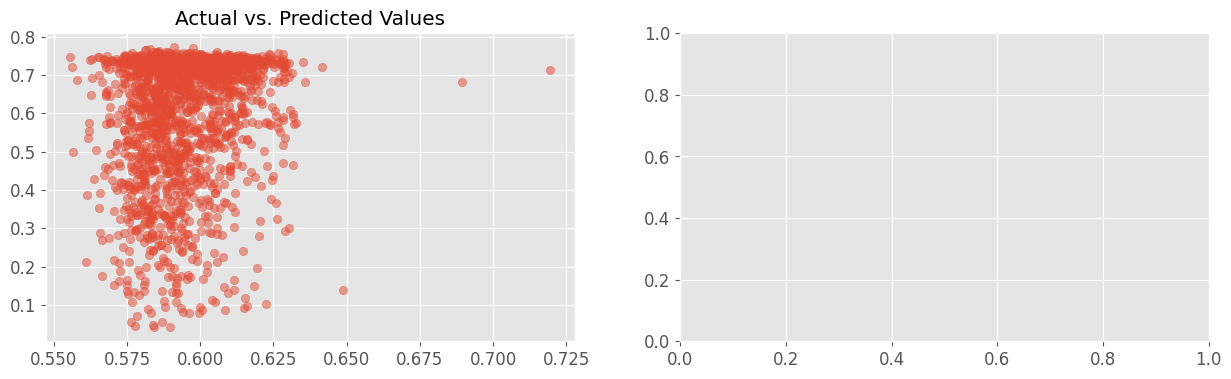

In [407]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols = 2,figsize = (15,4))
axs[0].scatter(x = y_pred, y = y_test,alpha = .5)
axs[0].set_title('Actual vs. Predicted Values')

[Text(0.5, 1.0, 'Feature Importance from Random Forest')]

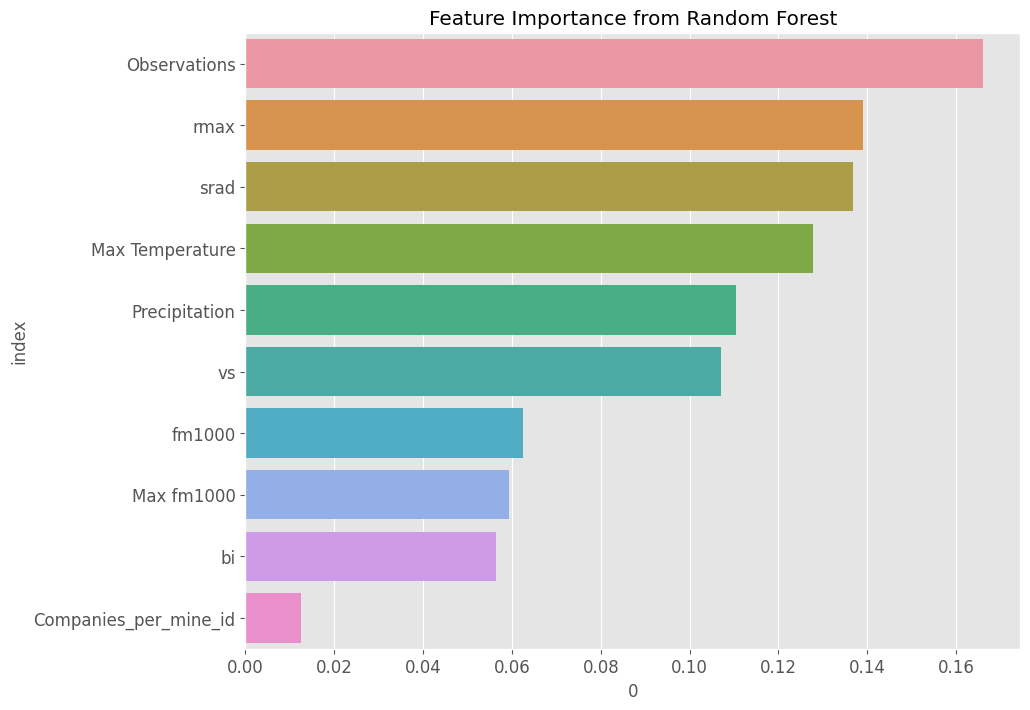

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12


feature_importance =rf.feature_importances_

forest_importances = pd.Series(feature_importance, index=selected_columns)
forest_importances = pd.DataFrame(forest_importances)

idx = forest_importances[0].sort_values(ascending = False).head(10).index
forest_importances2 = forest_importances.loc[idx]
data=forest_importances2.reset_index()

plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels

sns.barplot(x=0, y='index', data=data).set(title='Feature Importance from Random Forest')

In [351]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Prepare RNN Dataset with sequences





In [431]:
selected_columns

Index(['Max Temperature', 'vs', 'orig_perm_id', 'mines_per_perm_id', 'Company',
       'key', 'srad', 'Max fm1000', 'Companies_per_mine_id', 'imputation',
       'Observations', 'multistate_mine_id', 'bi', 'State', 'mine_id',
       'fm1000', 'rmax', 'start_date', 'Precipitation'],
      dtype='object')

In [434]:
columns = all_mines_encoded.columns
column_to_exclude = ['trees', 'water', 'snow_and_ice','grass','bare', 'flooded_vegetation', 'built', 'shrub_and_scrub', 'crops']
columns = list(set(columns) - set(column_to_exclude))
selected_columns = all_mines_encoded[columns].columns

sequence_length=4

features = all_mines_encoded[selected_columns]

target = all_mines_encoded['trees']
X, y, y_index = [], [], []
for i in range(len(features) - sequence_length):

   X.append(features.iloc[i:i + sequence_length].values)
   y.append(target.iloc[i + sequence_length])
   i=i+sequence_length

X=np.array(X)
y=np.array(y)

features['mine_id']=all_mines['mine_id']

for i in range(len(features) - sequence_length):
   y_index.append(features.mine_id.iloc[i + sequence_length])
   i=i+sequence_length

y_index=np.array(y_index)

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18,  random_state=0, stratify=y_index)

In [426]:
print(len(y_test))
print(len(X_test))
print(len(y_train))
print(len(X_train))

1907
1907
8687
8687


## RNN Model

In [376]:
pip install tensorboard

In [356]:
import tensorboard
import keras
from datetime import datetime
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


In [357]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [437]:
X_train.shape[2]

670

In [438]:
from tensorflow.keras.callbacks import EarlyStopping
feature_length = X_train.shape[0]
#Li and L2 regularization
#from keras import optimizers

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


# fix random seed for reproducibility
tf.random.set_seed(42)
regressor = Sequential()
regressor.add(LSTM(units = 30, input_shape=(sequence_length,
                   X_train.shape[2]),
                   return_sequences = True,
                   activation = 'relu'))

regressor.add(LSTM(units = 75, return_sequences = True, recurrent_dropout=0.3))
regressor.add(Dropout(0.15))
regressor.add(LSTM(75))
regressor.add(Dropout(0.15))
regressor.add(Dense(30))
regressor.add(Dense(1))
#adding in a higher learning rate
Adam = tf.keras.optimizers.Adam()

regressor.compile(optimizer = Adam, loss =tf.keras.losses.mean_squared_error)
es = EarlyStopping(monitor='loss', mode='min', patience=5, restore_best_weights=True)
regressor.fit(X_train, y_train, epochs=150, batch_size=32, validation_data= (X_test, y_test), callbacks=[es, tensorboard_callback])

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('\nMean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)

Epoch 1/150
272/272 [==============================] - 10s 15ms/step - loss: 0.0369 - val_loss: 0.0230
Epoch 2/150
272/272 [==============================] - 3s 12ms/step - loss: 0.0238 - val_loss: 0.0207
Epoch 3/150
272/272 [==============================] - 3s 12ms/step - loss: 0.0217 - val_loss: 0.0179
Epoch 4/150
272/272 [==============================] - 3s 12ms/step - loss: 0.0192 - val_loss: 0.0166
Epoch 5/150
272/272 [==============================] - 3s 12ms/step - loss: 0.0173 - val_loss: 0.0159
Epoch 6/150
272/272 [==============================] - 3s 12ms/step - loss: 0.0161 - val_loss: 0.0146
Epoch 7/150
272/272 [==============================] - 3s 13ms/step - loss: 0.0151 - val_loss: 0.0139
Epoch 8/150
272/272 [==============================] - 3s 12ms/step - loss: 0.0144 - val_loss: 0.0144
Epoch 9/150
272/272 [==============================] - 3s 12ms/step - loss: 0.0135 - val_loss: 0.0153
Epoch 10/150
272/272 [==============================] - 3s 12ms/step - loss: 0.01

In [440]:
regressor.model_to_dot

AttributeError: ignored

Text(0.5, 1.0, 'Actual vs. Predicted Values')

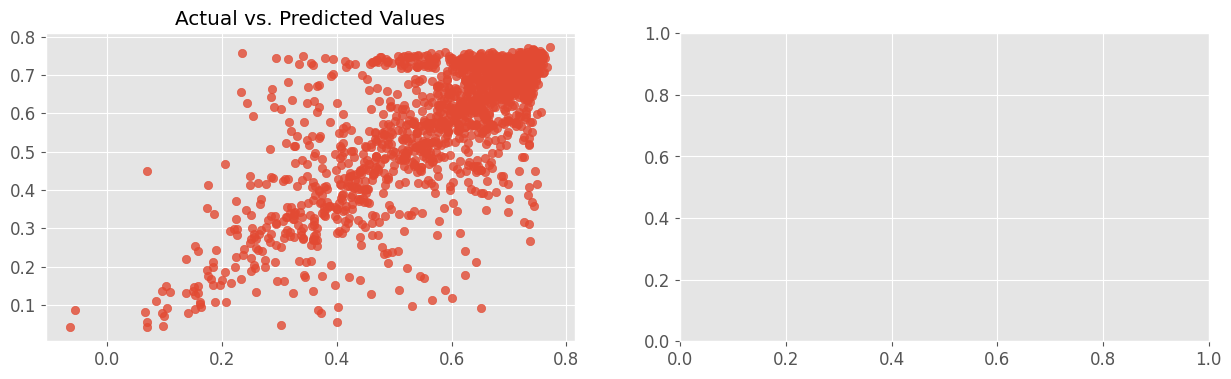

In [439]:
fig, axs = plt.subplots(ncols = 2,figsize = (15,4))
axs[0].scatter(x = y_pred, y = y_test,alpha = .8)
axs[0].set_title('Actual vs. Predicted Values')

In [360]:
pip install -U tensorboard-plugin-profile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 36.1 MB/s eta 0:00:00


In [361]:
regressor.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 4, 50)             12800     
                                                                 
 lstm_13 (LSTM)              (None, 4, 50)             20200     
                                                                 
 dropout_8 (Dropout)         (None, 4, 50)             0         
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 30)                1530      
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
!tensorboard dev upload \
  --logdir logs \
  --name "Sample op-level graph" \
  --one_shot

2023-10-15 13:53:10.196296: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   CMM-KVT-RHG



****************************************************************
************************

In [ ]:
pip install keras_core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 11.1 MB/s eta 0:00:00


In [ ]:
import keras_core
keras_core.utils.model_to_dot(
    model,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=200,
    subgraph=False,
    show_layer_activations=False,
    show_trainable=False,
    **kwargs
)

ModuleNotFoundError: ignored

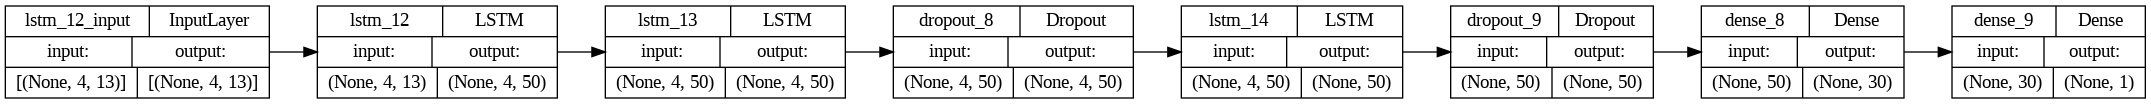

In [363]:

tf.keras.utils.plot_model(regressor, to_file='model.png', show_shapes=True, show_layer_names=True,rankdir='LR', expand_nested=True)

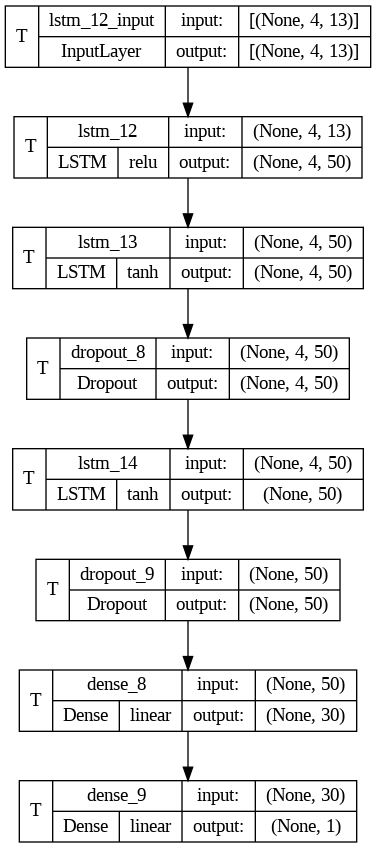

In [364]:
tf.keras.utils.plot_model(regressor, to_file='model.png',show_trainable=True, rankdir="TB",show_shapes=True, show_layer_activations=True)
